# Fit successful? True
# 2017-09-14 17:36:11.031955
# Units: cal/mol
# Fit type: bayesian
#   bayesian: Burn in: 0.1
#   bayesian: Final sample number: 900000
#   bayesian: Initial walker spread: 0.0001
#   bayesian: Num steps: 10000
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: 733.6220323486436
# AICc: 742.1934609200722
# BIC: 765.4953580148684
# F: 24.220753850053015
# Rsq: 0.824203162840302
# Rsq_adjusted: 0.7848004234769215
# df: 59
# ln(L): -352.8110161743218
# num_obs: 72
# num_param: 13
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,global_K1,NA,8.60193e+05,2.44462e+05,5.04939e+05,1.42402e+06,False,2.38225e+06,-inf,inf
global,global_K2,NA,6.54440e+09,3.85988e+09,2.32767e+09,1.67014e+10,False,7.12400e+10,-inf,inf
global,global_dH1,NA,-7.32404e+03,8.46644e+02,-9.06417e+03,-5.76999e+03,False,-4.94110e+03,-inf,inf
global,global_dH2,NA,-2.57767e+04,6.68342e+03,-3.92424e+04,-1.49563e+04,False

/home/luke/virtual_environments/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


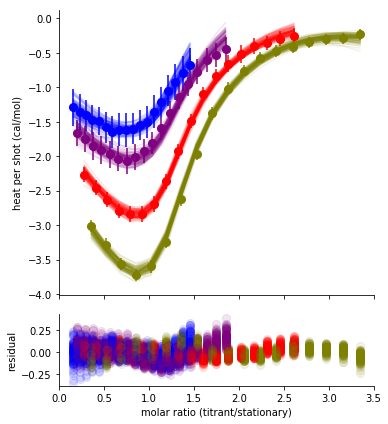

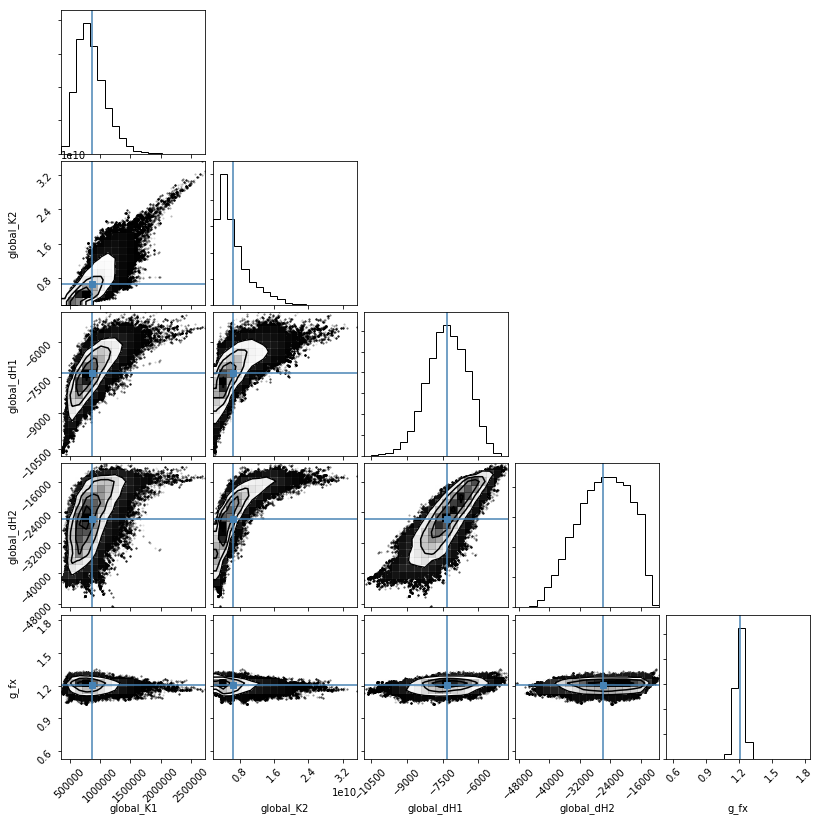

In [2]:
#Two site binding polynomial
%matplotlib inline
import matplotlib.pyplot as plt
import pytc
# --------------------------------------------------------------------
# Create a global fitting instance
p = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding polynomial model
a = pytc.ITCExperiment("hA5C43SC79SCaTESverylowtitrant_8X.sedphat",pytc.indiv_models.BindingPolynomial,num_sites=2,shot_start=2)

b = pytc.ITCExperiment("hA5C43SC79SCaTESlowTitrant_10X.sedphat",pytc.indiv_models.BindingPolynomial,num_sites=2,shot_start=2)

c = pytc.ITCExperiment("hA5C43SC79SCaTESmiditrant_15X.sedphat",pytc.indiv_models.BindingPolynomial,num_sites=2,shot_start=2)

d = pytc.ITCExperiment("hA5C43SC79SCaTESrep1_18X.sedphat",pytc.indiv_models.BindingPolynomial,num_sites=2,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
p.add_experiment(a)
#p.link_to_global(a,"dilution_heat","global_heat")
#p.link_to_global(a,"dilution_intercept","global_intercept")
p.link_to_global(a,"beta1","global_K1")
p.link_to_global(a,"beta2","global_K2")
p.link_to_global(a,"dH1","global_dH1")
p.link_to_global(a,"dH2","global_dH2")
p.link_to_global(a,"fx_competent","g_fx")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
p.add_experiment(b)
#p.link_to_global(b,"dilution_heat","global_heat")
#p.link_to_global(b,"dilution_intercept","global_intercept")
p.link_to_global(b,"beta1","global_K1")
p.link_to_global(b,"beta2","global_K2")
p.link_to_global(b,"dH1","global_dH1")
p.link_to_global(b,"dH2","global_dH2")
p.link_to_global(b,"fx_competent","g_fx")

# --------------------------------------------------------------------

# Load in an experimental data set with a single-site binding model

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
p.add_experiment(c)
#p.link_to_global(c,"dilution_heat","global_heat")
#p.link_to_global(c,"dilution_intercept","global_intercept")
p.link_to_global(c,"beta1","global_K1")
p.link_to_global(c,"beta2","global_K2")
p.link_to_global(c,"dH1","global_dH1")
p.link_to_global(c,"dH2","global_dH2")
p.link_to_global(c,"fx_competent","g_fx")

# --------------------------------------------------------------------

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
p.add_experiment(d)
#p.link_to_global(c,"dilution_heat","global_heat")
#p.link_to_global(c,"dilution_intercept","global_intercept")
p.link_to_global(d,"beta1","global_K1")
p.link_to_global(d,"beta2","global_K2")
p.link_to_global(d,"dH1","global_dH1")
p.link_to_global(d,"dH2","global_dH2")
p.link_to_global(d,"fx_competent","g_fx")

# --------------------------------------------------------------------

#p.update_bounds("global_dH1",(-5000,5000))
#p.update_bounds("global_dH2",(-50000,50000))


p.update_guess("global_dH1", -4.94110e+03)

p.update_guess("global_dH2", -9.31379e+03)

p.update_guess("global_K1", 2.38225e+06)

p.update_guess("global_K2", 7.12400e+10)

p.update_guess("g_fx", 1.43868e+00)


# Fit the data


FP = pytc.fitters.BayesianFitter(num_steps=10000,ml_guess=True,initial_walker_spread=0.0001,burn_in=0.10)
p.fit(FP)


# --------------------------------------------------------------------
# Show the results
fig, ax = p.plot()
plt.savefig("Bayesian_fit-refit2.pdf")
c = p.corner_plot()
plt.savefig("corner-plot-refit2.pdf")
print(p.fit_as_csv)